In [1]:
print(2.5 + 3.7)    # 더하기 / 6.2
print(7.9 - 4.2)    # 빼기 / 3.7
print(1.5 * 4.8)    # 곱하기 / 7.199999999999999
print(10.0 / 3.2)   # 나누기 / 3.125
print(10.0 // 3.2)  # 정수형 나누기 / 3.0
print(10.0 % 3.2)   # 모듈러  / 0.39999999999999947
print(2.0 ** 3.2)   # 제곱 연산 / 9.18958683997628

6.2
3.7
7.199999999999999
3.125
3.0
0.39999999999999947
9.18958683997628


In [2]:
import sys

# 엡실론 출력
print(sys.float_info.epsilon)  # 2.220446049250313e-16

# 부동소수점 수의 오차 검사
a = 1.5 * 4.8
b = 7.2
if abs(a - b) < sys.float_info.epsilon:
  print("a와 b는 같은 값입니다.")  # 이 코드가 출력됨
else:
  print("a와 b는 다른 값입니다.")

2.220446049250313e-16
a와 b는 다른 값입니다.


In [3]:
a = 1.5 * 4.8
b = 7.2

# 절대 오차를 사용하여 비교
absolute_tolerance = 1e-8
if abs(a - b) < absolute_tolerance:
    print("a와 b는 절대 오차 기준으로 같은 값입니다.")
else:
    print("a와 b는 절대 오차 기준으로 다른 값입니다.")

# 상대 오차를 사용하여 비교
relative_tolerance = 1e-8
if abs(a - b) < relative_tolerance * max(abs(a), abs(b)):
    print("a와 b는 상대 오차 기준으로 같은 값입니다.")
else:
    print("a와 b는 상대 오차 기준으로 다른 값입니다.")

a와 b는 절대 오차 기준으로 같은 값입니다.
a와 b는 상대 오차 기준으로 같은 값입니다.


In [4]:
#람다식

In [5]:
add = lambda x, y: x + y
print(add(5, 4)) # 9

9


In [6]:
num = [1, 2, 3, 4, 5]  # ➊ 리스트 선언
squares = list(map(lambda x: x**2, num))  # ➋ 람다식 넘기기
print(squares)  # [1, 4, 9, 16, 25]

[1, 4, 9, 16, 25]


In [7]:
a = [1.2, 2.5, 3.7, 4.6]
for i in range(len(a)):
    a[i] = int(a[i])

a


[1, 2, 3, 4]

In [13]:
#map은 리스트의 요소를 지정된 함수로 처리해주는 함수
a = [1.2, 2.5, 3.7, 4.6]
a = list(map(int, a))

a

[1, 2, 3, 4]

In [8]:
#조기반환
def total_price(quantity, price):
  total = quantity * price  # ➊
  if total > 100:   # ➋ total이 100보다 크면
    return total * 0.9      # ➌ 조기 반환
  return total

print(total_price(4, 50))

180.0


In [9]:
#보호구문
def calculate_average(numbers):
  if numbers is None:  # ➊ 값이 없으면 종료(예외)
    return None

  if not isinstance(numbers, list):  # ➋ numbers가 리스트가 아니면 종료(예외)
    return None

  if len(numbers) == 0:  # ➌ numbers의 길이가 0이면 종료(예외)
    return None

  total = sum(numbers)  # ➍
  average = total / len(numbers)

In [10]:
#합성함수

def add_three(x):  # ➊
  return x + 3

def square(x):  # ➋
  return x * x

composed_function = lambda x: square(add_three(x))  # ➌
print(composed_function(3))  # ➍ (3 + 3)^2 = 36

36


# **두개의 수로 특정값 만들기**

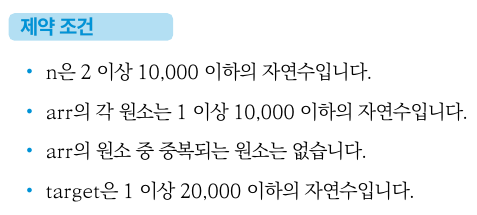

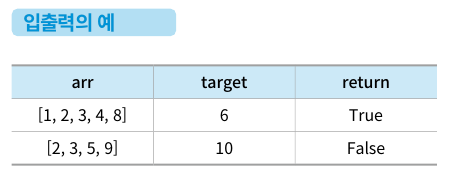

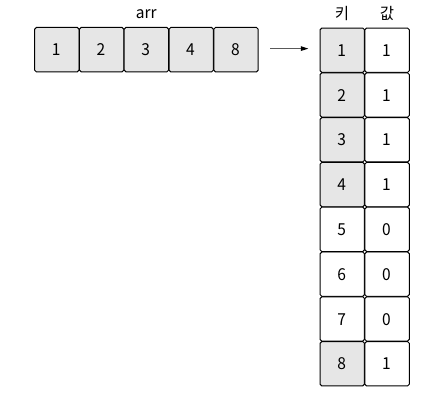

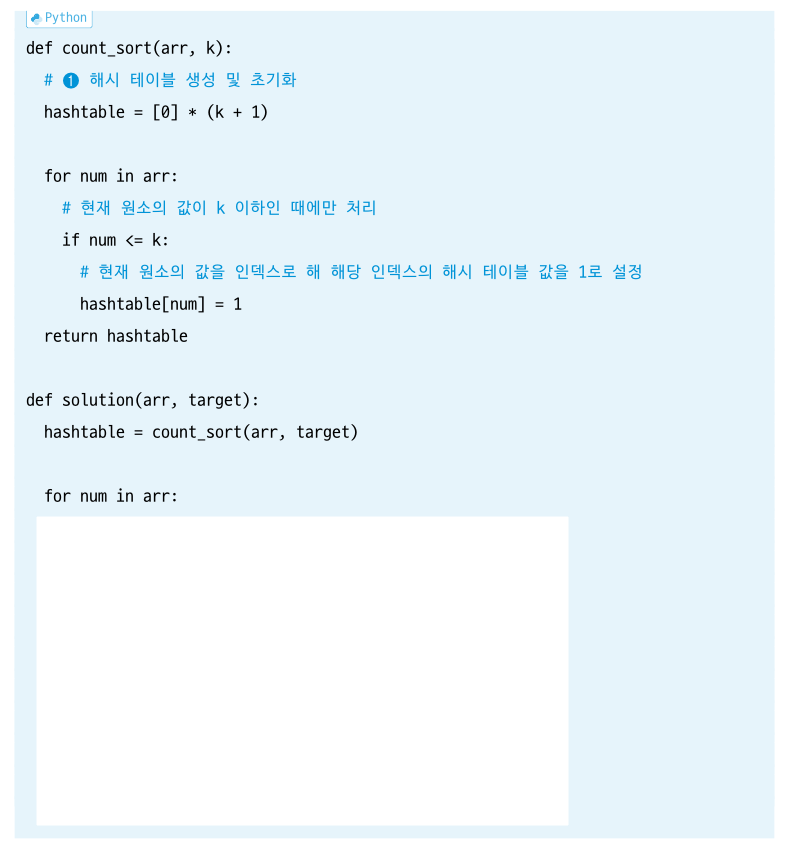

In [11]:
def count_sort(arr, k):
  # ➊ 해시 테이블 생성 및 초기화
  hashtable = [0] * (k + 1)
  for num in arr:
    # ➋ 현재 원소의 값이 k 이하인 때에만 처리
    if num <= k:
      # ➌ 현재 원소의 값을 인덱스로 해 해당 인덱스의 해시 테이블 값을 1로 설정
      hashtable[num] = 1
  return hashtable

def solution(arr, target):
  hashtable = count_sort(arr, target)

  for num in arr:
    complement = target - num
    # ➍ target에서 현재 원소를 뺀 값이 해시 테이블에 있는지 확인
    if (
      complement != num
      and complement >= 0
      and complement <= target
      and hashtable[complement] == 1
    ):
      return True
  return False

print(solution([1, 2, 3, 4, 8], 6)) # 반환값 : True

print(solution([2, 3, 5, 9], 10)) # 반환값 : False

True
False


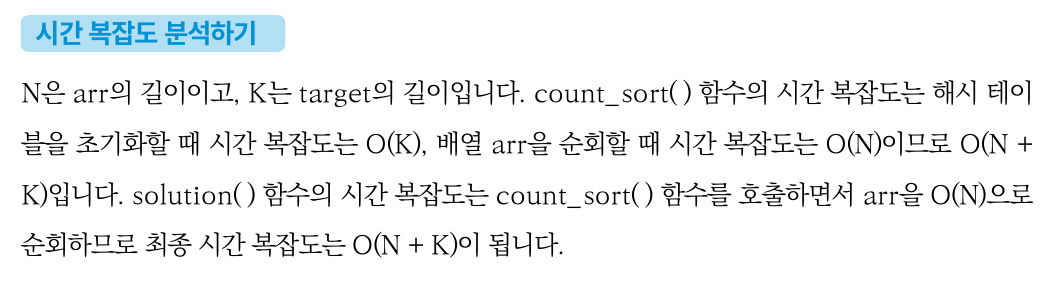

#**문자열 해싱을 이용한 검색함수 만들기**


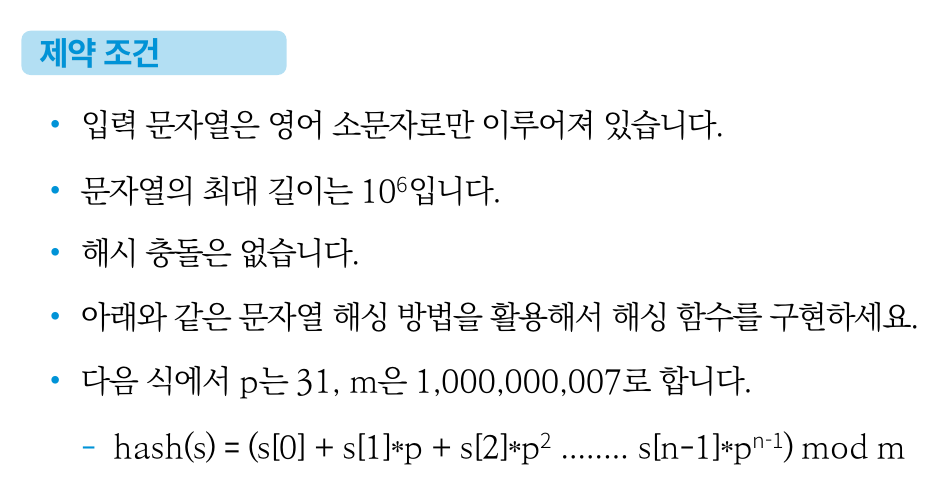

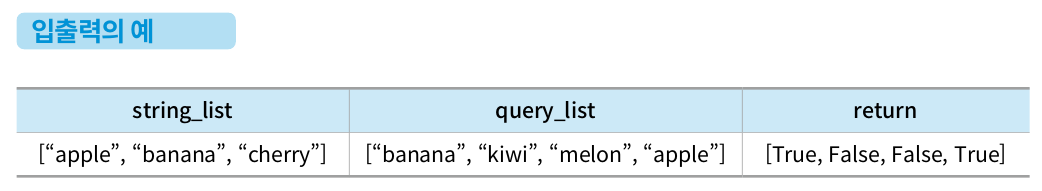

In [12]:
# ➊ polynomial hash를 구현한 부분
def polynomial_hash(str):
  p = 31  # 소수
  m = 1_000_000_007  # 버킷 크기  #숫자, 문자 자리수 구분을 위해 언더바를 사용 가능
  hash_value = 0
  for char in str:
    hash_value = (hash_value * p + ord(char)) % m
  return hash_value

def solution(string_list, query_list):
  # ➋ string_list의 각 문자열에 대해 다항 해시값을 계산
  hash_list = [polynomial_hash(str) for str in string_list]
  # ➌ query_list의 각 문자열이 string_list에 있는지 확인
  result = [ ]
  for query in query_list:
    query_hash = polynomial_hash(query)
    if query_hash in hash_list:
      result.append(True)
    else:
      result.append(False)
  return result

# TEST 코드 입니다. 주석을 풀고 실행시켜보세요
print(solution(["apple", "banana", "cherry"], ["banana", "kiwi", "melon", "apple"] )) # 반환값 : [True, False, False, True]

[True, False, False, True]


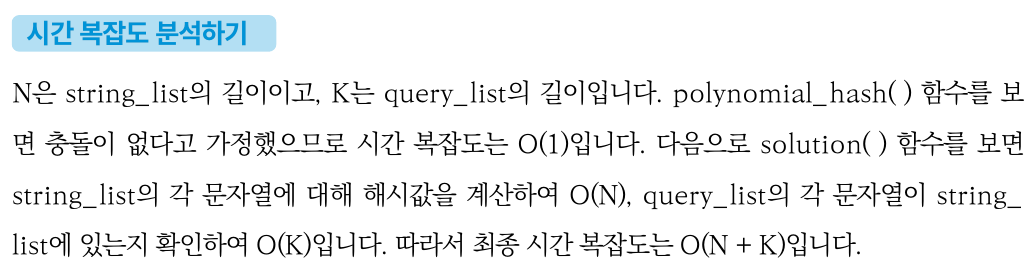